In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys, os
import numpy as np
import numpy.random as rd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline

import IPython.display as ipyd
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
def random_multi_sample_picker_idx(vec, n=2):
    ret_list = []
    n_data = len(vec)
    idx = np.arange(n_data)
    rd.shuffle(idx)
    return idx[:n]
    
def generate_train_data(alpha, beta):
    ''' Create Train Data'''
    
    N = 1000
    e = np.random.normal(0, 2, N)
    x = np.random.normal(10,3,N)
    y = alpha*x + beta + e
    return np.c_[x,y]

In [3]:
def animate(i):
    global a, b, frame
    print("\r progress: ({}/{})".format(i, frames), end="")
    
    # ------------- Logic Part ------------------# 
    idx = random_multi_sample_picker_idx(data, 3)
    d = data[idx]
    x1, y1, x2, y2, x3, y3 = d[0,0], d[0,1], d[1,0], d[1,1], d[2,0], d[2,1]

    Z = (y1 - A*x1 - B) ** 2 + (y2 - A*x2 - B) ** 2  + (y3 - A*x3 - B) ** 2 

    grad_a = np.sum([(2*a*(x**2) - 2*x*y + 2*b*x) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    grad_b = np.sum([(-2*y + 2*a*x + 2*b) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])

    current_z = (y1 - a*x1 - b) ** 2 + (y2 - a*x2 - b) ** 2  + (y3 - a*x3 - b) ** 2 
    next_a = a -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_a 
    next_b = b -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_b 

    learning_rate = (frames-i)/frames 
    diff = np.sqrt((next_a-a)**2 + (next_b-b)**2) * learning_rate # Distance between current and true position

    # -------------  Graph Drawing part ------------------# 
    # Countour drawing
    plt.clf()
    plt.subplot(2,1,1)
    plt.xlim(a_low,a_high)
    plt.ylim(b_low,b_high)
    ex = 5.
    mul = 10
    edge = 3000**(1/ex)/mul
    interval = [((mul*x)**ex) for x in np.linspace(0,edge,30)]   # In order to draw contour line as same interval for each line
    #title = "%d times,grad:(%+04.1f, %0+3.1f),diff=%.4f" % (i+1, grad_a, grad_b, diff)
    title = "{0:4d} times,grad:({1:8.1f}, {2:8.1f}),diff={3:8.4f}".format(i+1, grad_a, grad_b, diff)
    plt.title(title, fontsize=10)

    CS = plt.contour(A, B, Z, interval, cmap="RdYlBu", lw=1)
    for zc in CS.collections:
        plt.setp(zc, linewidth=0.5)

    # Position marker
    plt.scatter(a, b, s=40, c="b")                  # Current position
    plt.plot([a, next_a],[b, next_b], c="k")        # Line for next position
    plt.scatter(true_a, true_b, s=50, c="g")        # True position

    if diff < 0.0001:
        print ("break.")
        #break;

    # Drawing scatter plot for indicating regression line transition
    plt.subplot(2,1,2)
    #d = generate_train_data()
    plt.xlim(0, 22)
    plt.ylim(-5,25)
    plt.title("alpha=%+04.1f, beta=%+02.1f" % (a, b), fontsize=10)
    plt.scatter(data[:,0],data[:,1], s=8,alpha=0.6)
    plt.scatter(data[idx,0],data[idx,1], c="r", s=20, alpha=0.6)
    plt.plot([0,22],[b,22*a+b],"g", linewidth=2)

    a = next_a
    b = next_b

 progress: (0/120)0)

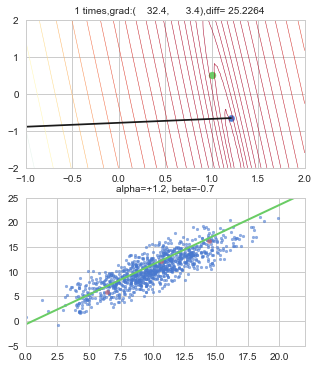

In [23]:
# 乱数シードの設定
np.random.seed(71)

# 真のパラメータ
true_a, true_b = 1, 0.5

# 描画幅
a_low, a_high  =  -1, 2
b_low, b_high  =  -2, 2

# 描画用フィールドデータの生成
af = np.linspace(a_low, a_high, 100)
bf = np.linspace(b_low, b_high, 100)
A, B = np.meshgrid(af, bf)

# 初期値
init_a = -1.5
init_b = -1.5

# 初期値を変数に代入
a = init_a
b = init_b

# テストデータの生成
data = generate_train_data(true_a, true_b)

# イテレーション回数
#frames = 250
frames = 120

fig = plt.figure(figsize=(5, 6))
anim = ani.FuncAnimation(fig, animate, frames=frames)
#anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=64)
anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=128)

In [24]:
np.random.seed(None)
ipyd.Image(url='SGD_anim.gif?{}'.format(rd.uniform()), height=400, width=400)